<h1> KNeighborsClassifier and GaussianNB  <h1>
 <h5>Anas Ba Ragaa _ B00075797<h5>
 <h5>Rayan Ben Daya _ B00073990 <h5>
 <h5>Rashid Alnuaimi  _ B00071921<h5>

In [2]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score


def save_array(a,filename):
    with open(filename, 'wb') as f:
        np.save(f, a)
def read_array(filename):
    with open(filename, 'rb') as f:
        a = np.load(f)        
    return a

# read data
    
X_FILE='x_file.txt'
Y_FILE='y_file.txt'
SCORES= ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', ]
#Loading x and y from files
X=read_array(X_FILE)
Y=read_array(Y_FILE)
print(Y.shape)
print(len([i for i in Y if i ==1]))
print(len([i for i in Y if i ==0]))
## The ratio between the instances of both classes is not highly unbalanced

(6037,)
2037
4000


In [3]:


from sklearn import preprocessing
# scale the data because the distance based algorithms like KNN perform better when data is scaled
#mm_scaler = preprocessing.MinMaxScaler()
#x = mm_scaler.fit_transform(X)
scaler = preprocessing.StandardScaler() # Standard scaler performed better
x=scaler.fit_transform(X)
y=Y

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_predict
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
metric = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', ]
# show confusion matrix
def plot_cm(cm):
    sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.show()
# do cross validation and return results     
def report_metrics(model,x,y, k=10 ):
   
    drop=[]
    s = cross_validate(model,x,y,cv=k, scoring=metric, return_train_score= True)
    y_pred=cross_val_predict(model, x, y, cv=k)  
    cm=confusion_matrix(y, y_pred)  
    tpr=cm[0][0]/(cm[0][1]+cm[0][0])
    tnr=cm[1][1]/(cm[1][0]+cm[1][1])
    for k in s.keys():
        if k not in (['test_'+ m for m in metric]+['train_'+ m for m in metric]):
            drop.append(k)
    for d in drop:
        del s[d]
    
    s['tpr']=np.array([tpr])
    s['tnr']=np.array([tnr])
    return s,cm

2NN : 


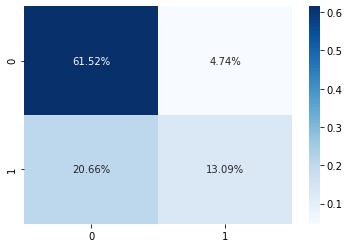

4NN : 


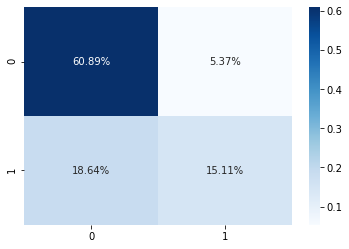

6NN : 


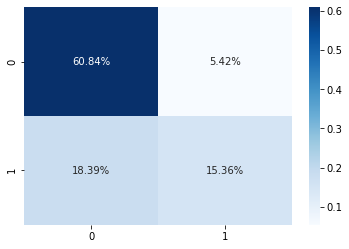

8NN : 


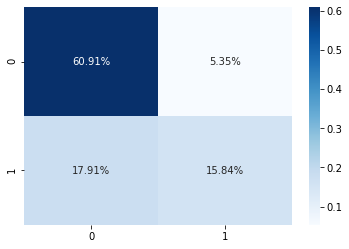

10NN : 


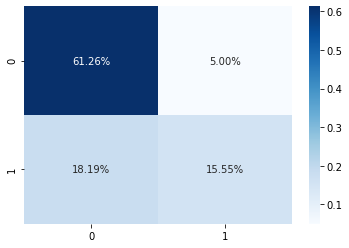

12NN : 


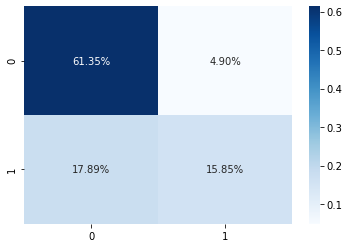

14NN : 


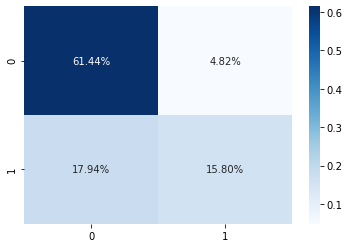

16NN : 


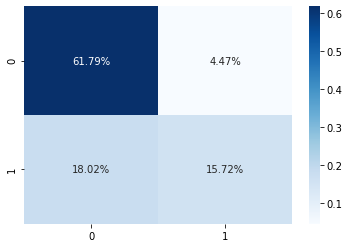

18NN : 


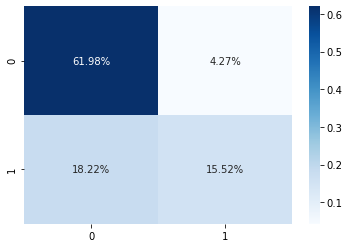

20NN : 


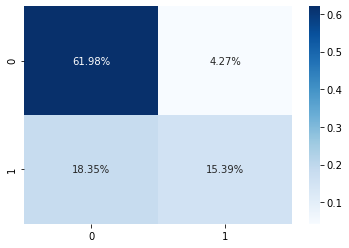

####################################
16NN was the best f1 score with f1 = 0.7144015896160069


In [7]:
# part 1 
from sklearn.neighbors import KNeighborsClassifier
results=dict() # to contain the average metrix for every model after cross validation
for i in range(2,21,2):
    model =  KNeighborsClassifier(n_neighbors=i)
    key=str(i)+'NN'
    results[key]=dict()
    s,cm=report_metrics(model,x,y)
    print(key +' : ')
    plot_cm(cm) # plot the confusion matrix for every model
    for m,v in s.items():
        results[key][m]= v.sum()/len(v) # get the average of k folds

f1=0
for k, v in results.items():
    if results[k]['test_f1_macro']>f1:
        key=k
        f1= results[k]['test_f1_macro']
print('####################################')
print (key + ' was the best f1 score with f1 = '+str(f1)  )


In [8]:
#part 2 
# use pandas dataframe to show the results in a nice table 
metric = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', ]
ds = [results[k] for k in results.keys() ]
data = {}
for k in ds[0].keys():
    data[k] = [d[k] for d in ds]
df = pd.DataFrame(data=data)
#for k in results.keys():
#    df=df.append(results[k],ignore_index=True)
#df.columns=[x for x in results['2NN'].keys()]
rows=dict()

for i, val in enumerate(results.keys()):
    rows[i]=val
df=df.rename( index=rows)
tr=['train_'+ m for m in metric]
train_df=df[tr].copy()
df=df.drop(tr, axis=1) # dividing dataframe to two for better visibility
train_df
###
# use print(train_df) & print(df) to get data in a text format

,train_precision_macro,train_recall_macro,train_f1_macro,train_accuracy
2NN,0.911281,0.788196,0.816953,0.857067
4NN,0.853433,0.762885,0.785322,0.829165
6NN,0.829862,0.751064,0.771016,0.816392
8NN,0.816568,0.739690,0.758549,0.806729
10NN,0.810400,0.733533,0.751909,0.801833
12NN,0.807570,0.729019,0.747227,0.798778
14NN,0.805136,0.725268,0.743298,0.796220
16NN,0.804552,0.722916,0.740913,0.794895
18NN,0.802976,0.719268,0.737127,0.792649
20NN,0.800466,0.715856,0.733459,0.790238


In [9]:
df

,test_precision_macro,test_recall_macro,test_f1_macro,test_accuracy,tpr,tnr
2NN,0.742365,0.658161,0.667988,0.746066,0.92850,0.387825
4NN,0.752317,0.683354,0.696239,0.759980,0.91900,0.447717
6NN,0.753954,0.686660,0.699677,0.761966,0.91825,0.455081
8NN,0.760758,0.694291,0.707943,0.767434,0.91925,0.469318
10NN,0.764390,0.692735,0.706763,0.768096,0.92450,0.460972
12NN,0.769648,0.697907,0.712406,0.772073,0.92600,0.469809
14NN,0.770671,0.697796,0.712333,0.772406,0.92725,0.468336
16NN,0.777125,0.699197,0.714402,0.775057,0.93250,0.465881
18NN,0.779299,0.697755,0.712965,0.775058,0.93550,0.459990
20NN,0.778330,0.695794,0.710802,0.773732,0.93550,0.456063


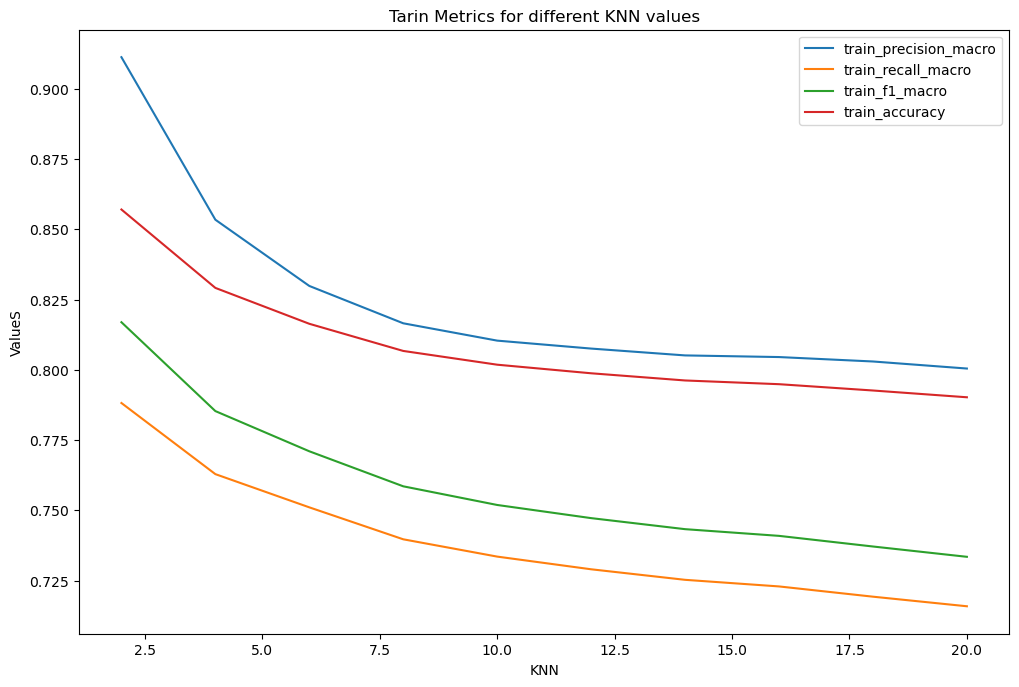

In [10]:
#Plotting some results
x_axis= [int(s.split('N')[0]) for s in results.keys()]

keys=[k for k in  results['2NN'].keys() if k.startswith('train')]
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

for key in keys:
    y_axis=[results[n][key] for n in results.keys()]            
    plt.plot(x_axis, y_axis,  label=key)
        
plt.xlabel("KNN")
plt.ylabel("ValueS")
plt.title("Tarin Metrics for different KNN values")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

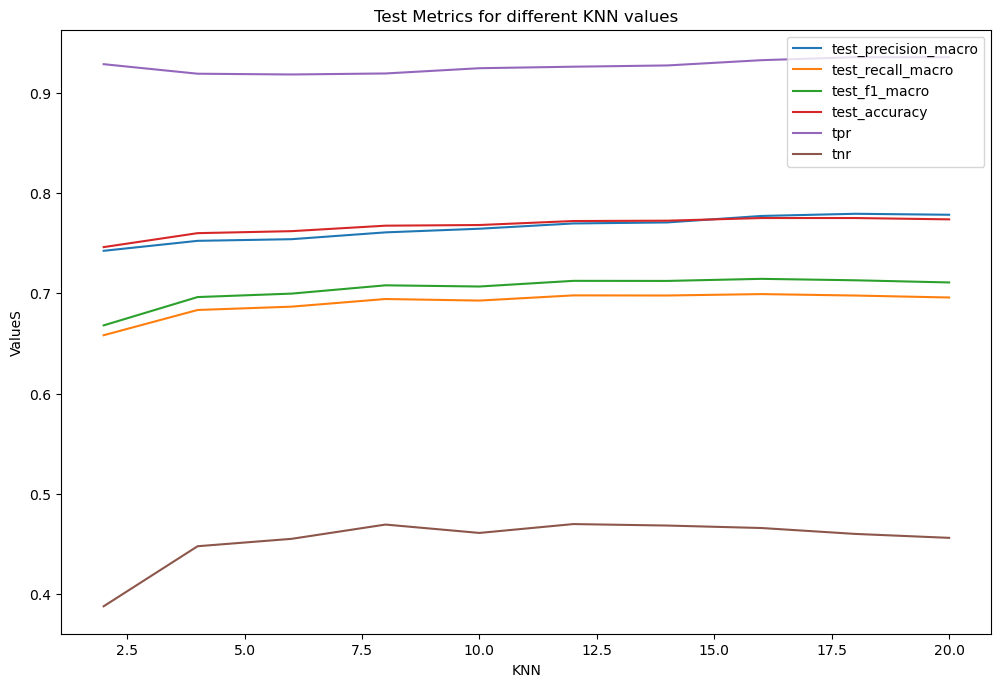

In [11]:
#Plotting some results
x_axis= [int(s.split('N')[0]) for s in results.keys()]

keys=[k for k in  results['2NN'].keys() if not k.startswith('train')]
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

for key in keys:
    y_axis=[results[n][key] for n in results.keys()]            
    plt.plot(x_axis, y_axis,  label=key)
        
plt.xlabel("KNN")
plt.ylabel("ValueS")
plt.title("Test Metrics for different KNN values")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()
        

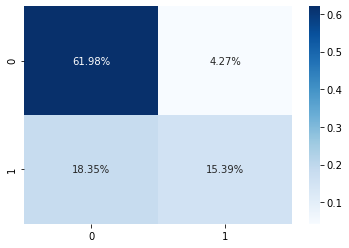

{'test_precision_macro': 0.7402501804755264, 'train_precision_macro': 0.7412120827210767, 'test_recall_macro': 0.6890731430503235, 'train_recall_macro': 0.6908156485475796, 'test_f1_macro': 0.700779670571041, 'train_f1_macro': 0.7028585419371519, 'test_accuracy': 0.757497007237543, 'train_accuracy': 0.7585813999034378, 'tpr': 0.8995, 'tnr': 0.4786450662739323}


In [12]:
#parts 3 & 4

# no hyper parameters requiered for GaussianNB
from sklearn.naive_bayes import GaussianNB
m= GaussianNB()
s,m=report_metrics(m,x,y,k=10)
res=dict()
plot_cm(cm)
for m,v in s.items():
        res[m]= v.sum()/len(v)
print(res)


['test_precision_macro', 'test_recall_macro', 'test_f1_macro', 'test_accuracy', 'train_precision_macro', 'train_recall_macro', 'train_f1_macro', 'train_accuracy']
